# Online News Popularity Prediction

<font color="green">**A regression analysis of the popularity of online news articles based on various features**</font>

### Introduction

<font color="green">**The project will help online news companies to predict the popularity of online news articles using machine learning techniques. The dataset used is the Online News Popularity Data Set from the UCI Machine Learning Repository1(<href>https://archive.ics.uci.edu/dataset/332/online+news+popularity</href>), which contains features about news articles and their associated popularity metrics.. The notebook explores the data using descriptive statistics and visualizations, and then applies different machine learning models**</font>

### Goal

<font color="green">**To predict the popularity of online news articles, measured by factors like reads, likes, and shares, we aim to leverage machine learning techniques to identify which stories are likely to gain recognition. Our project analyzes a dataset of 39,643 articles from the website Mashable, focusing on developing a simple yet effective classification algorithm to predict the likelihood of an article becoming popular even before its publication. By optimizing for accuracy and simplicity, our goal is to provide a reliable model that can assist in content strategy and decision-making for online news platforms.**</font>

### Attribute Information

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center">Importing Libraries </h2>

In [71]:
import warnings # For warning handling

import pandas as pd   # For data manipulation
import seaborn as sns  # For advanced visualization
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting

from scipy.stats import boxcox,zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler # For encoding categorical data and for standardizing features
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # For splitting dataset into training and testing data, and for performong hyperparameter tuning
from sklearn.decomposition import PCA

# Machine learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # For evaluation metrics

# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center">Importing Dataset </h2>

In [26]:
df = pd.read_csv("OnlineNewsPopularity.csv")  #Reading Dataset from csv file

<font color="green">**This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity)**</font>

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center">Data Insights </h2>

In [3]:
df.head()  #First 5 rows in the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.describe().T.round(2) #Descriptive statistics of Numerical data

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.53,214.16,8.00,164.00,339.00,542.00,731.00
n_tokens_title,39644.0,10.40,2.11,2.00,9.00,10.00,12.00,23.00
n_tokens_content,39644.0,546.51,471.11,0.00,246.00,409.00,716.00,8474.00
n_unique_tokens,39644.0,0.55,3.52,0.00,0.47,0.54,0.61,701.00
n_non_stop_words,39644.0,1.00,5.23,0.00,1.00,1.00,1.00,1042.00
n_non_stop_unique_tokens,39644.0,0.69,3.26,0.00,0.63,0.69,0.75,650.00
num_hrefs,39644.0,10.88,11.33,0.00,4.00,8.00,14.00,304.00
num_self_hrefs,39644.0,3.29,3.86,0.00,1.00,3.00,4.00,116.00
num_imgs,39644.0,4.54,8.31,0.00,1.00,1.00,4.00,128.00
num_videos,39644.0,1.25,4.11,0.00,0.00,0.00,1.00,91.00


In [3]:
df.info()  # for understanding structure and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

<font color="green">**This dataset provides insights into online news popularity, inclusive 39644 entries and 60 attributes. Our target column is **</font>
<font color="red">**'Shares'**</font>

In [4]:
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

The shape = (39644, 61)
Number of Rows: 39644
Number of Columns: 61
Number of Features: 60
Number of All Data: 2418284


<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Data Preprocessing </h2>

### Checking null values

In [63]:
df.isnull().sum()  #Checking count of null values in each column

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

<font color="green">**The dataset doesn't contain any null values!!**</font>

### Checking duplicated rows

In [8]:
df.duplicated().sum() #Checking whether duplicated rows presents in the dataset

0

<font color="green">**As there is no duplicated rows exists, no need to handle it!!**</font>

### Rename columns

In [27]:
df.columns = df.columns.str.strip() # Renaming column for ease of further analysis
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [28]:
df.rename(columns={'shares' : 'Shares'}, inplace=True)  # Renaming column for ease of further analysis

<font color="green">**As the columns consists of a space in the beginning, we removed it for the ease of further analysis**</font>

### Encoding Categorical Variables

Encoding  strings into numerical values is essential for model compatibility and performance.

In Label Encoding, each unique vaue is assigned assigned with an integer value

In [29]:
label_encoder = LabelEncoder()
df['url_encoded'] = label_encoder.fit_transform(df['url'])
df.drop(columns = 'url',inplace = True)

<font color="green">**The only categorical column in the dataset is 'url'. We encoded it using the label encoding method as it is not heirarcical**</font>

### Data Visualization

#### Overall Popularity analysis

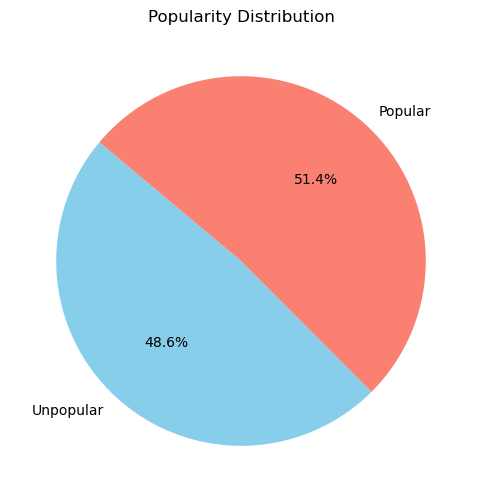

In [8]:
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
df1=[len(unpopular),len(popular)]
labels = ['Unpopular','Popular']
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(df1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Popularity Distribution')
plt.show()

<font color="green">**The dataset contains 51.4% of popular news and 48.6% of unpopular news, considering**</font> <font color="red">**1400 Shares**</font> <font color = "green">**as a threshold value**</font>

#### Popularity Analysis over Days of Week

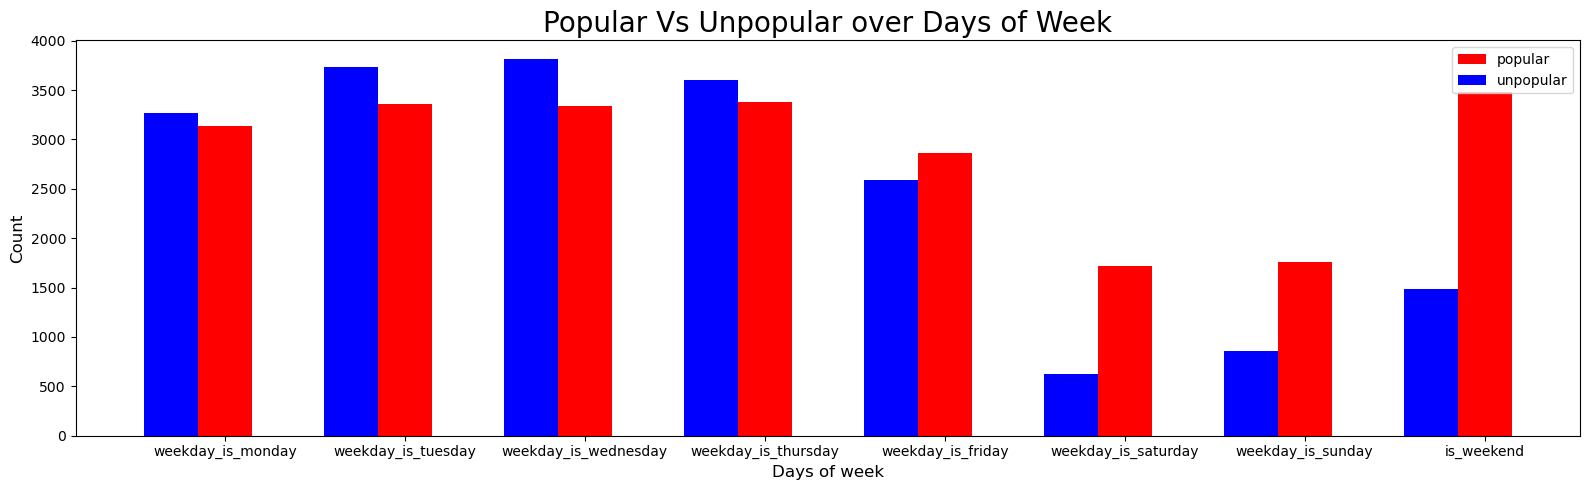

In [13]:
columns_day = df.columns.values[30:38]
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
unpopular_day = unpopular[columns_day].sum().values
popular_day = popular[columns_day].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Days of Week', fontsize=20)
plt.bar(np.arange(len(columns_day)),popular_day, width=0.3, align="center", color='r',label = 'popular')
plt.bar(np.arange(len(columns_day)) - 0.3, unpopular_day, width=0.3, align="center", color='b', label='unpopular')

plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

<font color="green">**The visual proves Wednesday having more unpopular news, while saturdat having the least. Similarly weekends having popular news while saturday having the least.**</font>

#### Popularity Analysis over Channel Category

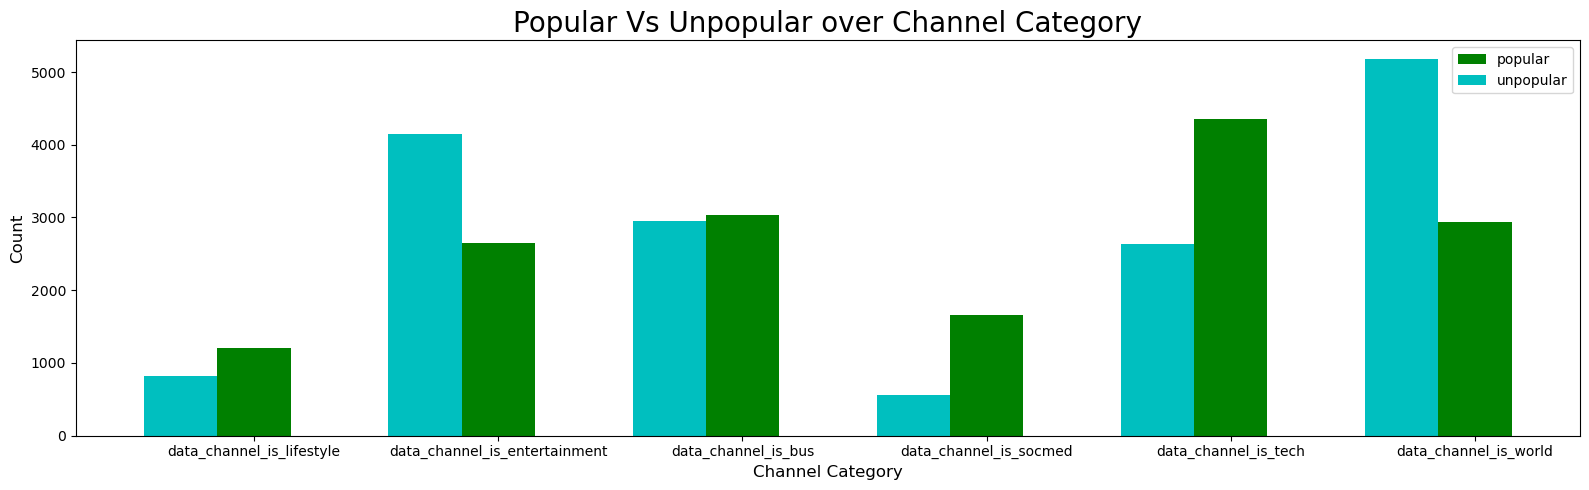

In [14]:
columns_channel = df.columns.values[12:18]
unpopular_channel = unpopular[columns_channel].sum().values
popular_channel = popular[columns_channel].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Channel Category', fontsize=20)
plt.bar(np.arange(len(columns_channel)),popular_channel, width=0.3, align="center", color='g',label = 'popular')
plt.bar(np.arange(len(columns_channel)) - 0.3, unpopular_channel, width=0.3, align="center", color='c', label='unpopular')

plt.xticks(np.arange(len(columns_channel)), columns_channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Channel Category", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

<font color="green">**The visual proves World channel contains more unpopular news, while scomed contains the least. Similarly Tech channel contains more popular news while lifestyle contains the least.**</font>

#### Correlation Heatmap

A correlation heatmap is a graphical representation of the relationships between numerical variables in a dataset. It uses colors to convey the strength and direction of correlations, providing a clear and intuitive way to analyze dependencies between features.

In [15]:
corr1 = df.corr()
corr1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares,url_encoded
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662,-0.998599
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783,0.240772
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459,0.059771
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806,-0.003018
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443,-0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
title_sentiment_polarity,0.038711,0.000240,0.023358,-0.002333,-0.001650,-0.002910,0.039041,0.026224,0.046310,0.021980,...,0.076898,0.085878,0.078795,-0.000470,0.232130,1.000000,-0.240112,0.410205,0.012772,-0.038318
abs_title_subjectivity,0.011551,-0.146954,0.007136,-0.009242,-0.008511,-0.008572,0.009443,0.008961,-0.013759,-0.021982,...,-0.017131,-0.006573,-0.010531,-0.001877,-0.487172,-0.240112,1.000000,-0.400272,0.001481,-0.011032
abs_title_sentiment_polarity,-0.002745,0.040550,0.013439,-0.004217,-0.004391,-0.005342,0.056525,-0.006709,0.063307,0.055231,...,0.082966,-0.075594,-0.058398,-0.017444,0.714528,0.410205,-0.400272,1.000000,0.027135,0.002756
Shares,0.008662,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,...,0.010068,-0.032029,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135,1.000000,-0.009739


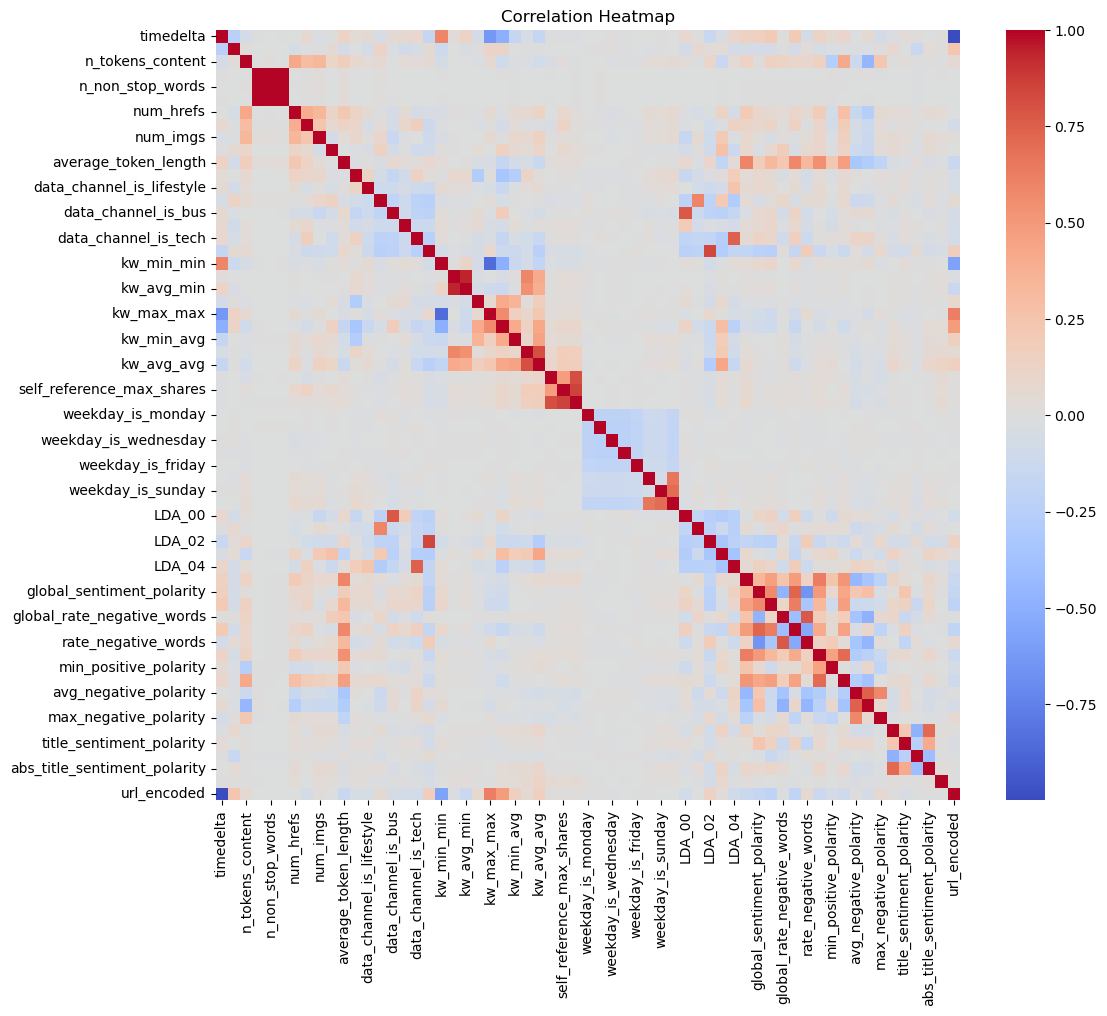

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

#### Distribution of Shares

Histogram displays the frequency of data points that fall within a series of intervals

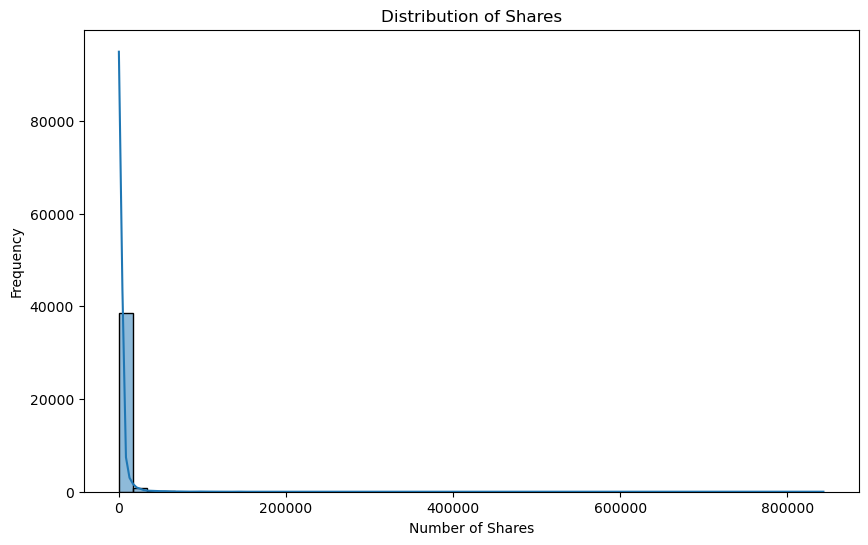

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()


<font color="green">**The histogram shows that most data points fall within the lower range of the "Number of Shares". THis represents that there is a few viral posts with high shares**</font>

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Outlier Detection </h2>

Outliers are data points that differ significantly from other observations in a dataset. They are extreme values that lie far away from the overall pattern or distribution of the data. Outliers can result from variability in the data, measurement errors, or rare but valid occurrences.

In [30]:
df_new = df.copy()

### Outlier Detection and Handling

<font color="green">**We do not need to check skewness for boolean columns represented as 0s and 1s because these columns represent categorical or binary states rather than continuous distributions. As they are binary columns, they are already normalized**</font>



In [31]:
boolean_columns = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech',
                   'data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
                  'weekday_is_saturday','kw_max_max','weekday_is_sunday','is_weekend']  #  Columns which are boolean (having values zeros and ones only)
filtered_columns = [item for item in df_new.columns if item not in boolean_columns]

In [32]:
len(filtered_columns)

46

Let's plot the boxplot of the selected 47 columns

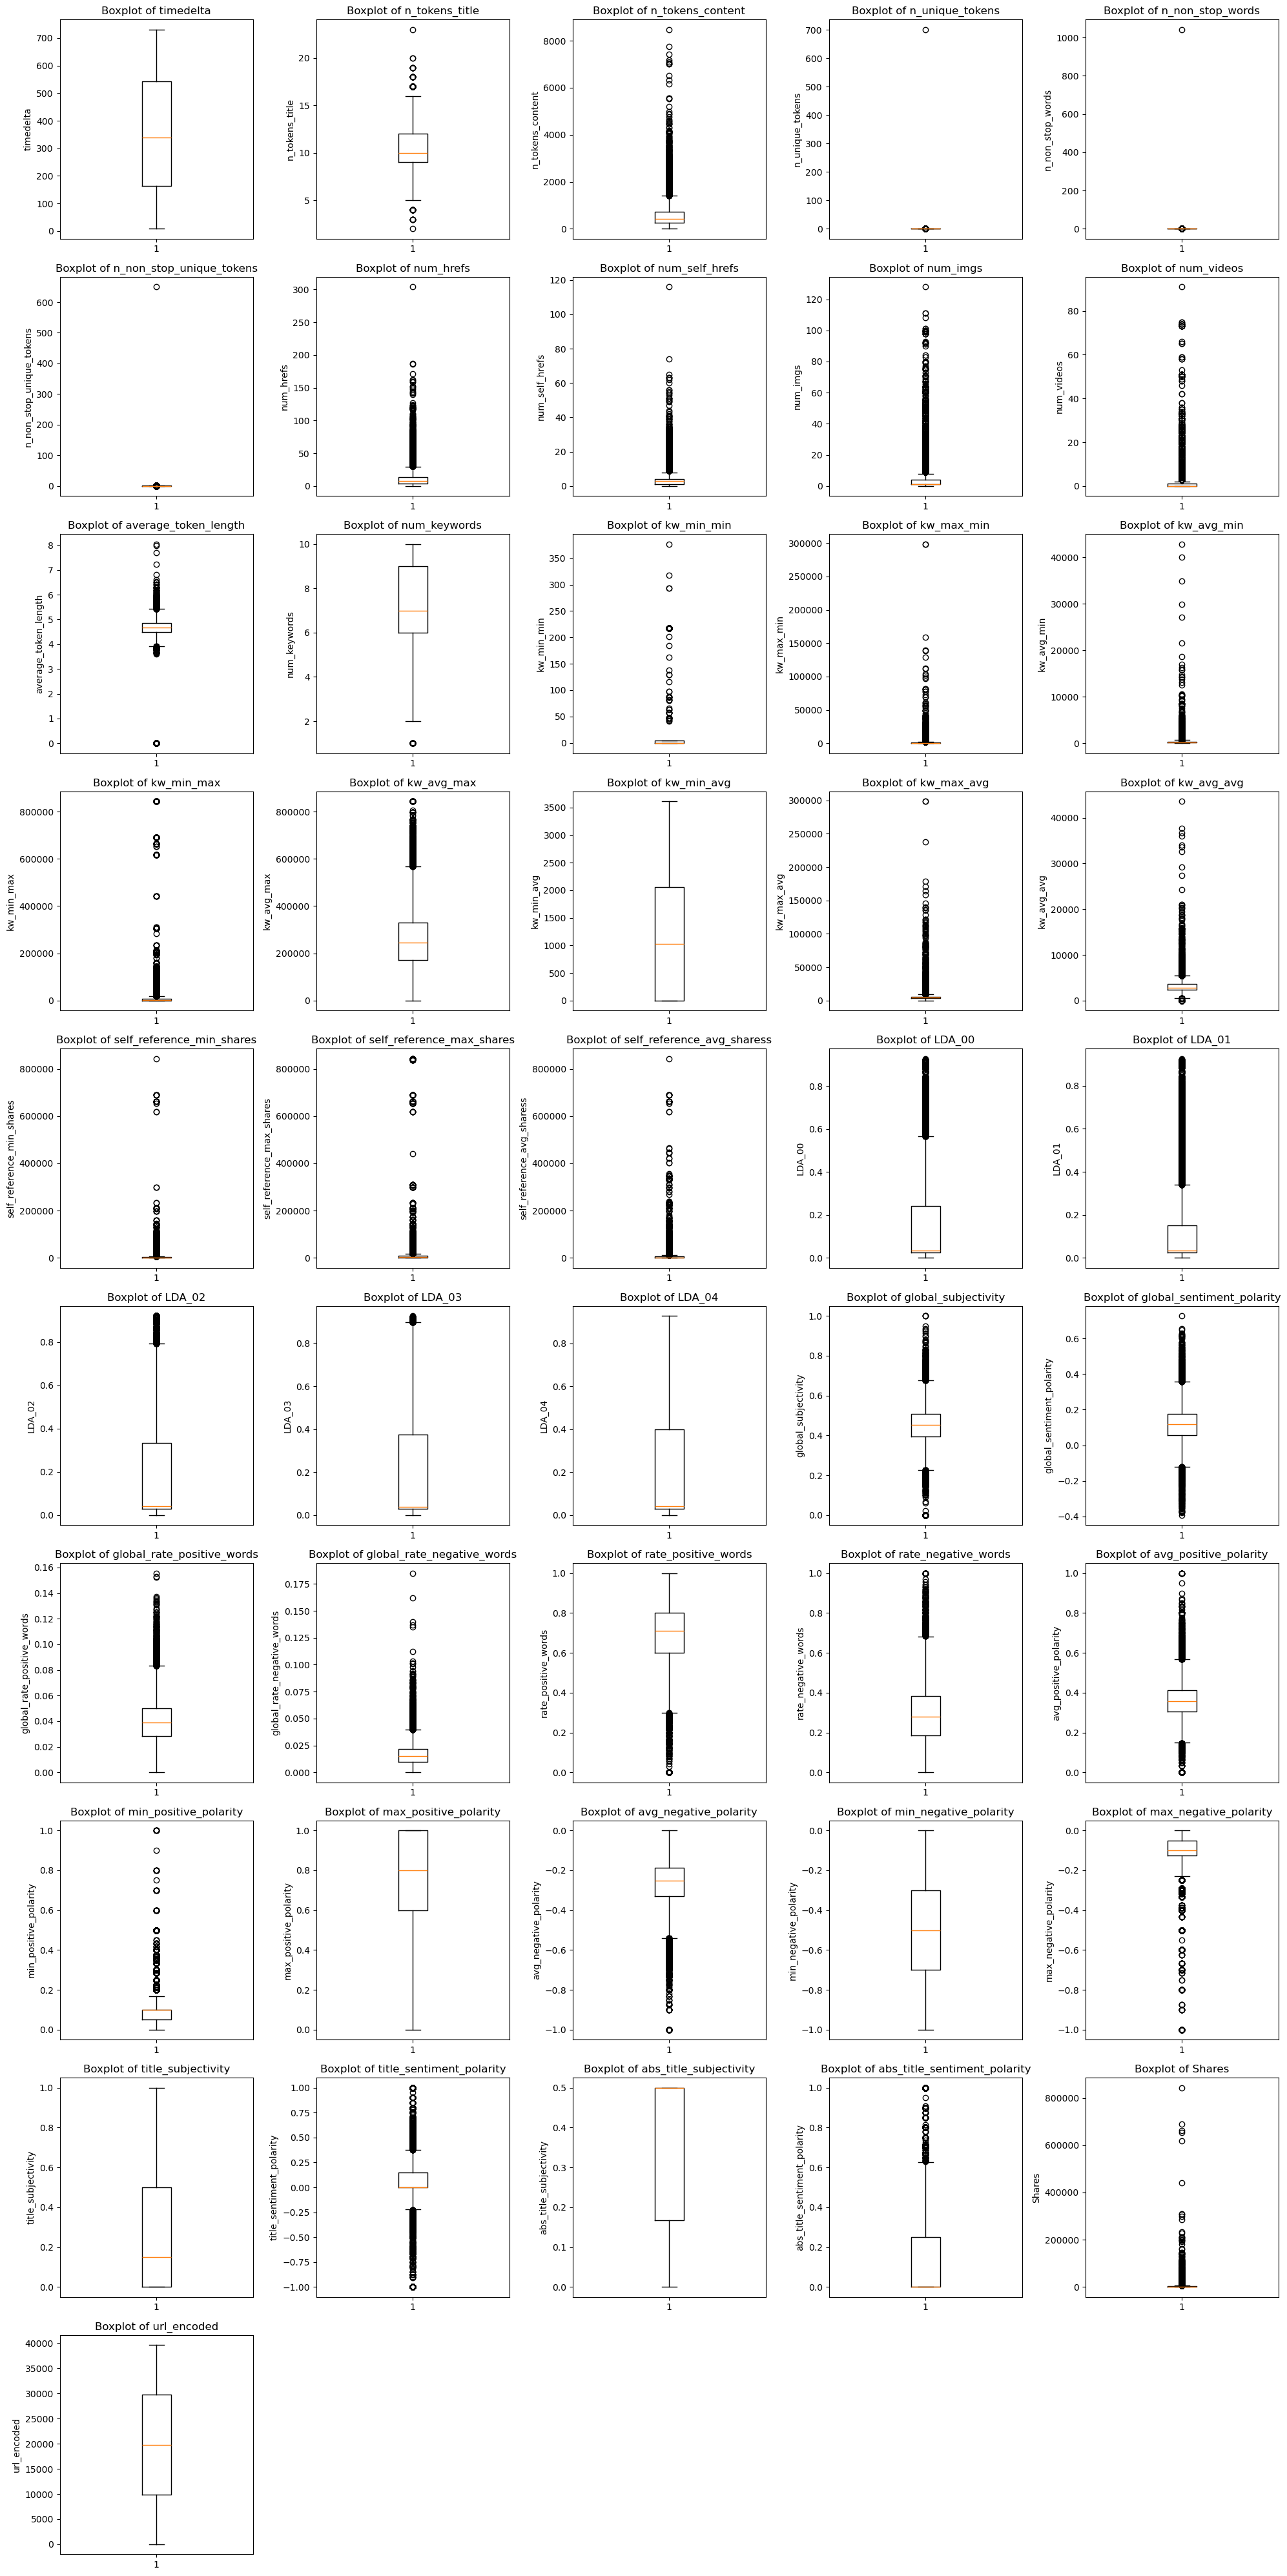

In [33]:
def plot_boxplot() :
    cols_per_row = 5
    num_rows = int(len(filtered_columns) / cols_per_row) + 1
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 4))
    axes = axes.flatten()
    for i, col in enumerate(filtered_columns):
        axes[i].boxplot(df_new[col])
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_ylabel(col)
    
    for i in range(len(filtered_columns), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
plot_boxplot()

Many of the columns showing sigificant outliers. 

### Skewness Checking and transformation

Skewness refers to the asymmetry or deviation from symmetry in the distribution of data. A distribution is considered skewed if it is not symmetrical and has a longer or fatter tail on one side. Understanding skewness is important because it gives insights into the shape of the data distribution, which affects statistical analysis and the choice of appropriate models.

In [34]:
for col in filtered_columns:
    print(f"{col} : {df_new[col].skew()}")   # Showing skewness of numerical columns

timedelta : 0.12050427403732356
n_tokens_title : 0.16532037674928027
n_tokens_content : 2.9454219387867084
n_unique_tokens : 198.65511559825592
n_non_stop_words : 198.7924453768874
n_non_stop_unique_tokens : 198.44329440926512
num_hrefs : 4.013494828201318
num_self_hrefs : 5.172751105757634
num_imgs : 3.9465958446535474
num_videos : 7.0195327862958665
average_token_length : -4.57601155020474
num_keywords : -0.14725125199950523
kw_min_min : 2.3749472801825444
kw_max_min : 35.32843373115432
kw_avg_min : 31.306108102660584
kw_min_max : 10.386371634782769
kw_avg_max : 0.6243096463608944
kw_min_avg : 0.4679758464905322
kw_max_avg : 16.41166955537124
kw_avg_avg : 5.760177291618559
self_reference_min_shares : 26.264364160300094
self_reference_max_shares : 13.870849049433598
self_reference_avg_sharess : 17.9140933776756
LDA_00 : 1.5674632332004765
LDA_01 : 2.0867218234169407
LDA_02 : 1.311694902028395
LDA_03 : 1.2387159863782728
LDA_04 : 1.1731294759766238
global_subjectivity : -1.372688830560

In [35]:
skewed_columns = []
for col in filtered_columns:
    if (df_new[col].skew() < -1) | (df_new[col].skew() > 1) :
        print(f"{col} : {df_new[col].skew()}") 
        skewed_columns.append(col)

n_tokens_content : 2.9454219387867084
n_unique_tokens : 198.65511559825592
n_non_stop_words : 198.7924453768874
n_non_stop_unique_tokens : 198.44329440926512
num_hrefs : 4.013494828201318
num_self_hrefs : 5.172751105757634
num_imgs : 3.9465958446535474
num_videos : 7.0195327862958665
average_token_length : -4.57601155020474
kw_min_min : 2.3749472801825444
kw_max_min : 35.32843373115432
kw_avg_min : 31.306108102660584
kw_min_max : 10.386371634782769
kw_max_avg : 16.41166955537124
kw_avg_avg : 5.760177291618559
self_reference_min_shares : 26.264364160300094
self_reference_max_shares : 13.870849049433598
self_reference_avg_sharess : 17.9140933776756
LDA_00 : 1.5674632332004765
LDA_01 : 2.0867218234169407
LDA_02 : 1.311694902028395
LDA_03 : 1.2387159863782728
LDA_04 : 1.1731294759766238
global_subjectivity : -1.3726888305603973
global_rate_negative_words : 1.491917309190822
rate_positive_words : -1.423105853002299
min_positive_polarity : 3.0404677374643283
max_negative_polarity : -3.459747

Many of the columns showing higher skewness value. So we need to apply tansformations

#### Box-cox Transformation

Some of the columns having negative values. So while applying log or sqrt transform it values become NaN. So we apply box-cox transform on these columns by adding minimum value of the column with the value, while applying transform

In [36]:
columns_for_boxcox =  ['kw_min_min','kw_avg_min','max_negative_polarity']

In [37]:
for col in columns_for_boxcox :
    min_value = df_new[col].min()
    df_new[col], _ =  boxcox(df_new[col] + abs(min_value) + 1)
    print(f"{col} : {df_new[col].skew()}")

kw_min_min : 0.547600823368014
kw_avg_min : 0.42602098415941414
max_negative_polarity : -0.1147734249587759


The above columns' skewness value is reduced now!!

#### Log Transformation

Let's apply log transform to **right skewed columns(positive skewness)** which are : 
n_tokens_content : 2.9454219387867084,
n_unique_tokens : 198.6551155982559,2
n_non_stop_words : 198.79244537688,74
num_hrefs : 4.013494828201,318
num_self_hrefs : 5.17275110575,7634
num_imgs : 3.94659584465,35474
num_videos : 7.0195327862,958665
kw_max_min : 35.3284337,3115432
kw_min_max : 10.3863716,34782769
self_reference_min_shares : 26.264364,160300094
self_reference_max_shares : 13.87084,9049433598
self_reference_avg_sharess : 17.91,40933776756
min_positive_polarity : 3.0404,677374643283
Shares : 33.9,6388487571415
n_non_stop_unique_tokens : 198.,44329440926512
kw_max_avg : 16,.41166955537124
kw_avg_avg : 5.760177291618559

In [38]:
right_skewed_columns = ['n_tokens_content','n_unique_tokens','n_non_stop_words','num_hrefs','num_self_hrefs','num_imgs','num_videos','kw_max_min',
                        'kw_min_max','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','min_positive_polarity',
                        'Shares','n_non_stop_unique_tokens','kw_max_avg','kw_avg_avg']


In [39]:
for col in right_skewed_columns :
    df_new[col] =  np.log(df_new[col] + 1)
    print(f"{col} : {df_new[col].skew()}")

n_tokens_content : -2.9231473200190217
n_unique_tokens : 3.407664403307744
n_non_stop_words : -1.5532547720685865
num_hrefs : -0.2038106708548575
num_self_hrefs : 0.06718996438344768
num_imgs : 1.004432422464436
num_videos : 2.321877416520578
kw_max_min : -2.4264890906367578
kw_min_max : -0.10694081601371075
self_reference_min_shares : -1.2361349654287794
self_reference_max_shares : -1.2489090782169754
self_reference_avg_sharess : -1.3050094671263215
min_positive_polarity : 2.320100836133716
Shares : 1.0264770065011177
n_non_stop_unique_tokens : 1.048364796599401
kw_max_avg : -5.275003709911879
kw_avg_avg : -8.429218879192607


#### Square Root Transformation

Let's apply squareroot transform to **left skewed columns(negative skewness)** which are : abs_title_sentiment_polarity, average_token_length,kw_max_max,global_subjectivity,rate_positive_words

In [40]:
left_skewed_columns = ['average_token_length','kw_max_max','global_subjectivity','rate_positive_words']

In [41]:
for col in left_skewed_columns :
    max_value = df_new[col].max()
    df_new[col] = np.sqrt(max_value - df_new[col])
    print(f"{col} : {df_new[col].skew()}")

average_token_length : 3.9854396261221776
kw_max_max : 1.8214062995221927
global_subjectivity : 0.5770552809032669
rate_positive_words : -0.3441952292288302


Rest of the columns having moderate skewness values. So let's leave them so. 
LDA_00 : 1.5674632332004765, 
LDA_01 : 2.0867218234169407, 
LDA_02 : 1.311694902028395, 
LDA_03 : 1.2387159863782728, 
LDA_04 : 1.1731294759766238, 
abs_title_sentiment_polarity : 1.7041934399140888

Still we have both right and left skewed columns. So let's apply boxcox transform on those

In [42]:
Columns_for_transform = ['n_tokens_content','n_unique_tokens','num_videos','average_token_length','kw_max_min','kw_max_avg','kw_avg_avg',
                        'min_positive_polarity']

In [43]:
for col in Columns_for_transform :
    min_value = df_new[col].min()
    df_new[col], _ =  boxcox(df_new[col] + abs(min_value) + 1)
    print(f"{col} : {df_new[col].skew()}")

n_tokens_content : -0.15097485458533055
n_unique_tokens : 2.1014844990651955
num_videos : 0.6044143095658869
average_token_length : -3.0802732139490887
kw_max_min : 0.38818394747527035
kw_max_avg : 1.0634271893414022
kw_avg_avg : 0.49610450261603134
min_positive_polarity : -0.003936988217390914


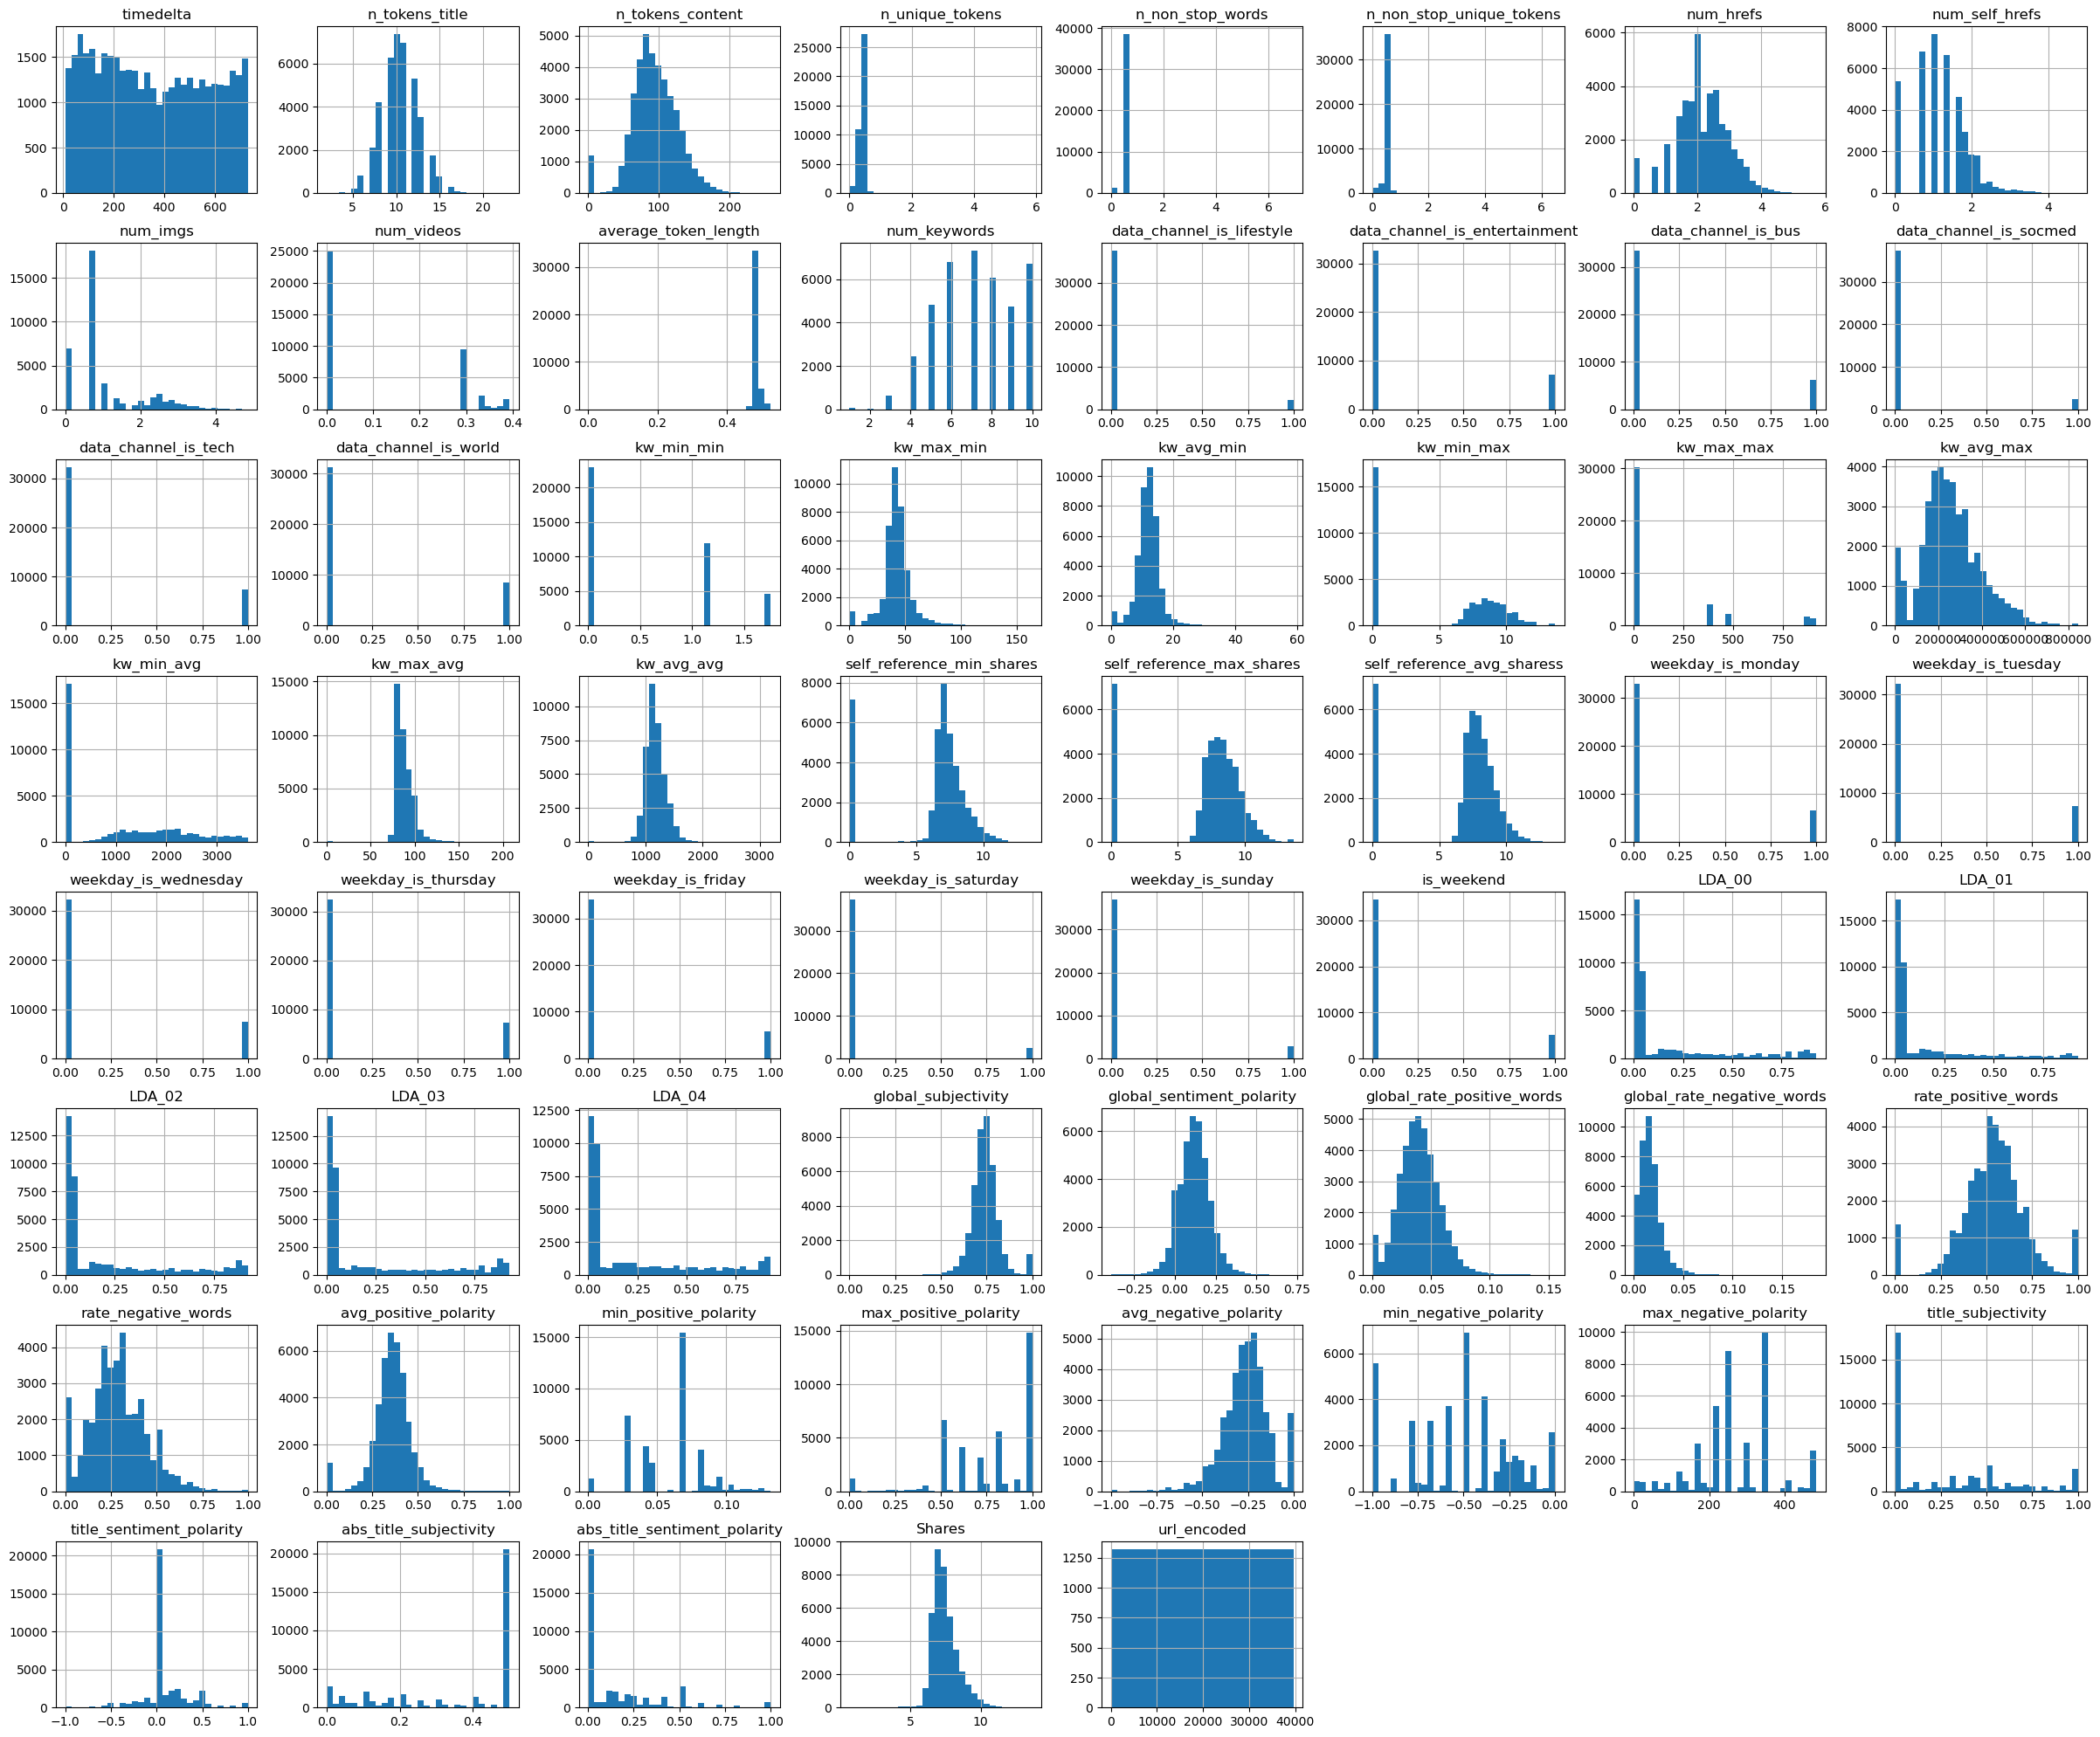

In [381]:
df_new.hist(bins=30, figsize=(30,25))
plt.show()

#### IQR method to handle outliers


**The Interquartile Range** (IQR) method is a statistical technique for identifying outliers in a dataset. It uses the spread of the middle 50% of data to determine whether a data point is unusually high or low. This method is simple, effective, and widely used in data preprocessing.

**Quartiles**:

Data is divided into four equal parts:

Q1 (First Quartile): The 25th percentile (lower quartile).

Q3 (Third Quartile): The 75th percentile (upper quartile).


**Interquartile Range (IQR)**:

The IQR is the range between the first and third quartiles:

IQR = 𝑄3 − 𝑄1

**Outlier Thresholds**:

Data points are considered outliers if they fall outside:

Lower Bound = 𝑄1 − 1.5×IQR

Upper Bound = 𝑄3 + 1.5×IQR

In [384]:
"""for i, col in enumerate(filtered_columns):
    q1=df_new[col].quantile(0.25)
    q3=df_new[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outliers = (df_new[col]<lower) | (df_new[col]>upper)
    mean_value = df_new[col].mean()
    df_new.loc[outliers,col]=mean_value

    #df_new[col] = np.where(df_new[col] < lower, lower, df_new[col])
    #df_new[col] = np.where(df_new[col] > upper, upper, df_new[col])
    
    #df_new = df_new[(df_new[col] >= lower) & (df_new[col] <= upper)]"""

Here we replaced the outliers detected with mean of the corresponding columns. Let's again plot the boxplot of all the selected columns

<font color="green">**Data is more improved now!! Lets apply the changes we have done on dataframe**</font>

#### Z-score method

The **Z-score** method is a statistical technique for identifying outliers in a dataset. It measures how far a data point deviates from the mean of the data in terms of standard deviations. Points with Z-scores that exceed a defined threshold are considered potential outliers. The Z-score for a data point is calculated using the formula:

**𝑍 = (X-μ)/σ**

The Z-score measures how many standard deviations x is away from the mean:

Z-score of 0 means the data point is exactly at the mean.

Z-score of +1 means the data point is one standard deviation above the mean.

Z-score of -1 means the data point is one standard deviation below the mean.

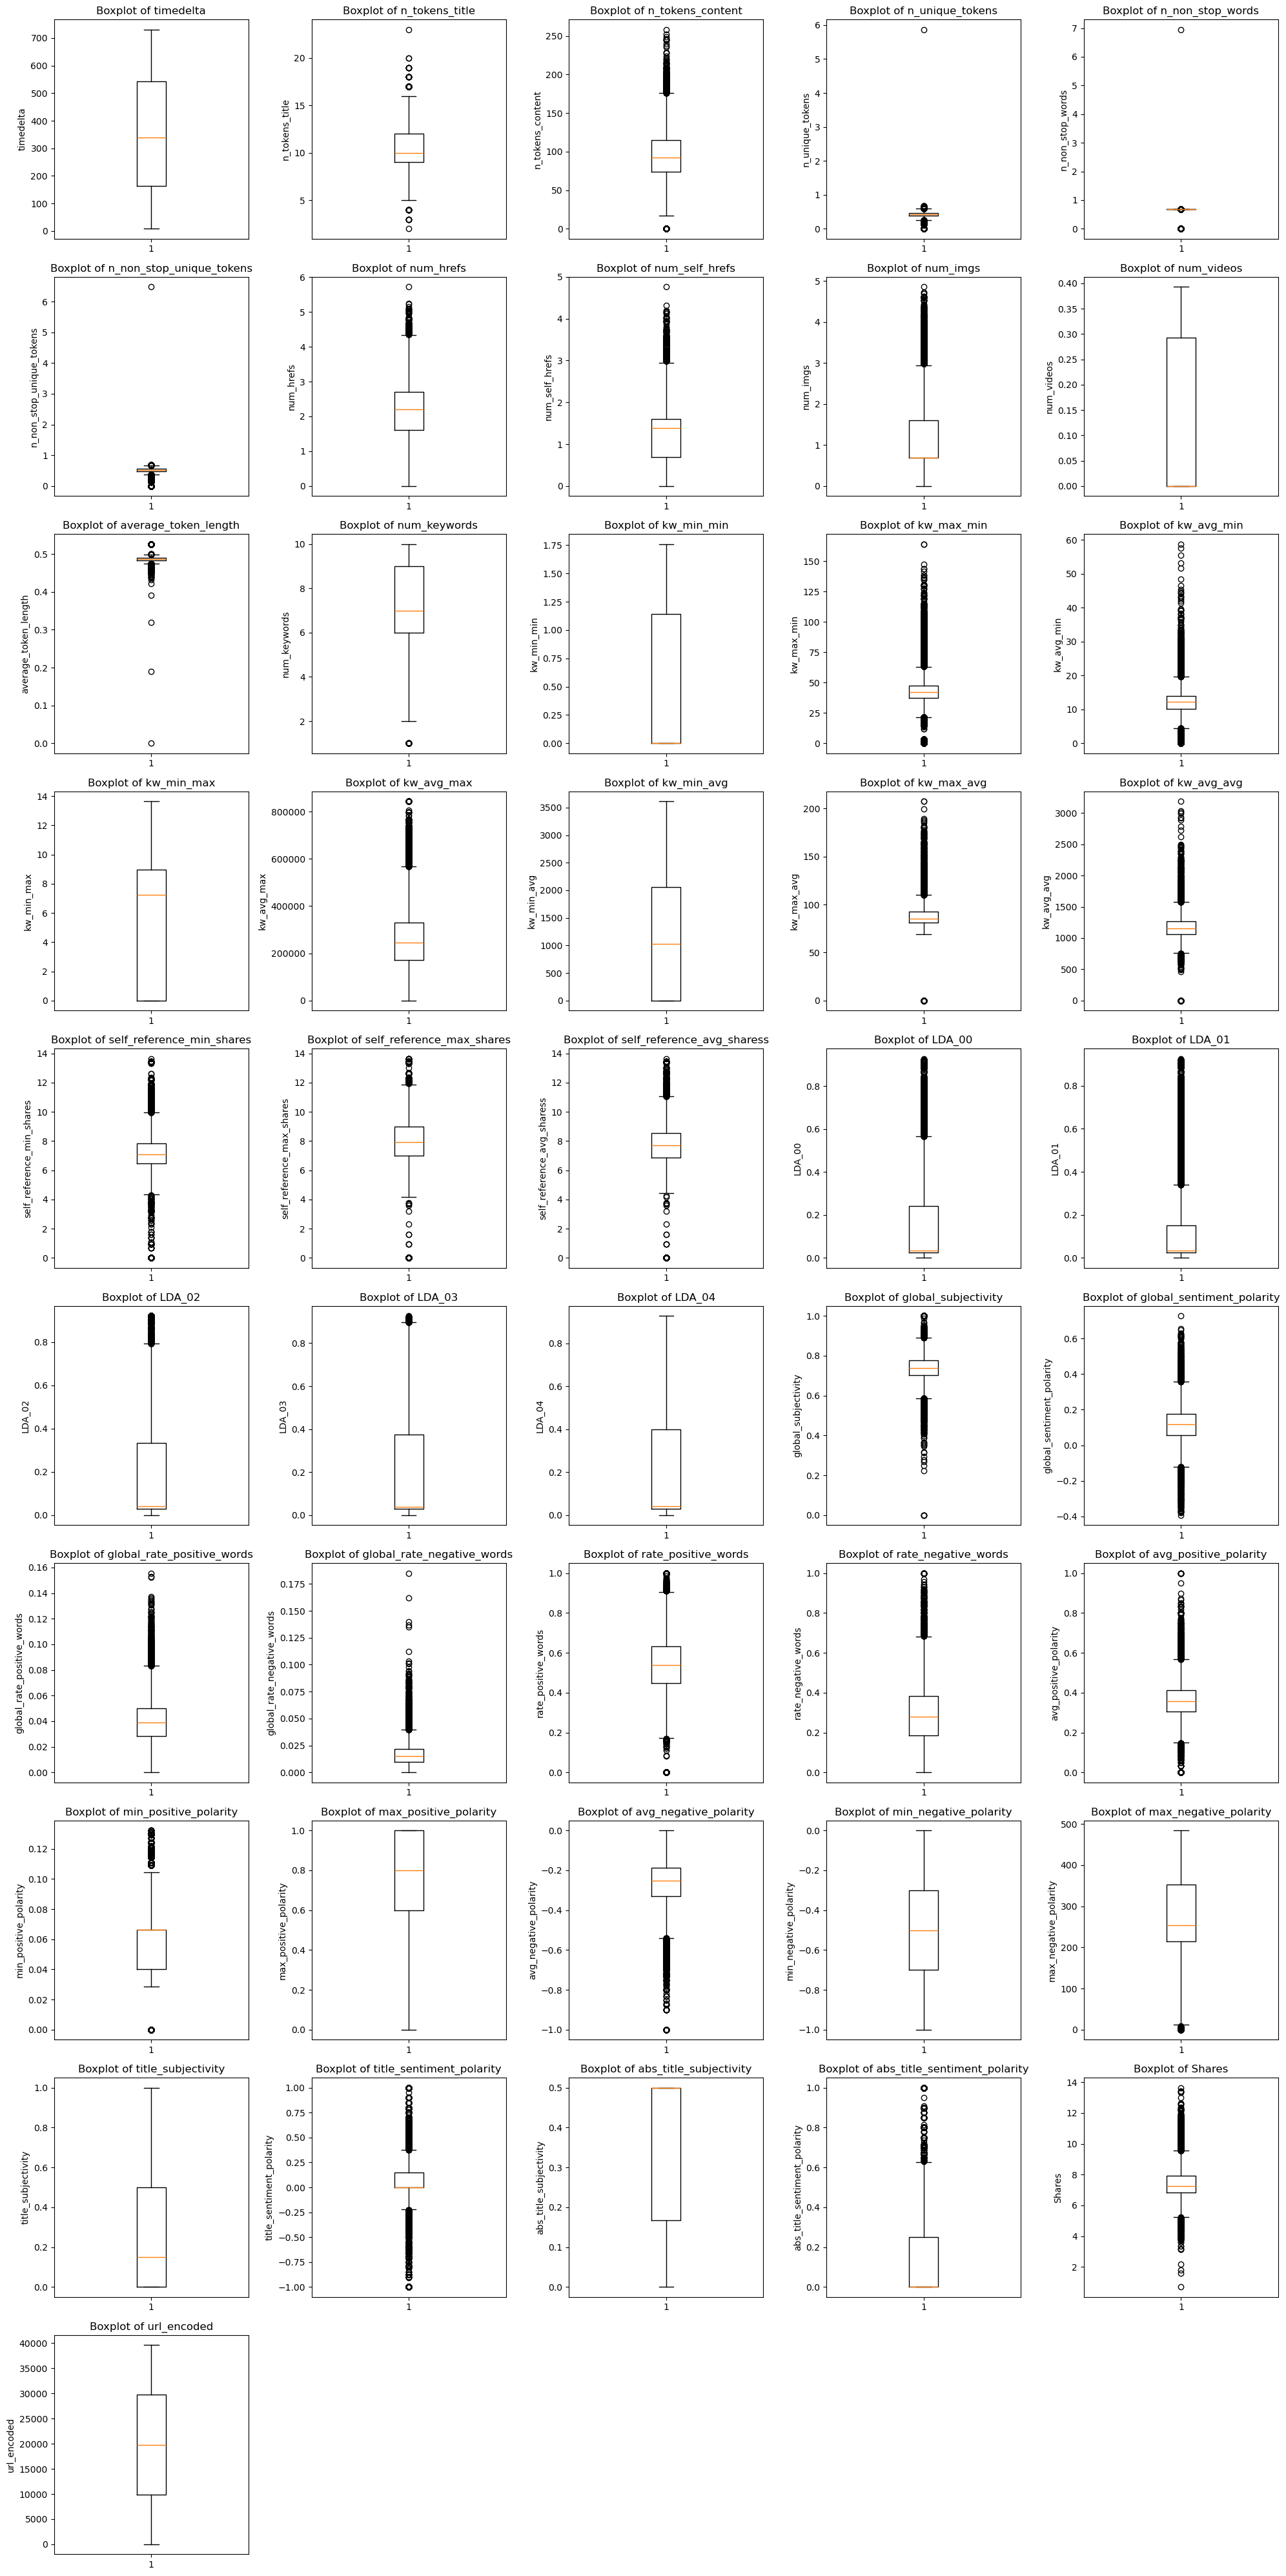

In [44]:
plot_boxplot()

In [45]:
z_threshold = 3

for col in df_new.columns:
    z_scores = zscore(df_new[col])
    
    outliers = np.abs(z_scores) > z_threshold
    
    if outliers.any():  
        df_new[col] = np.where(outliers, df_new[col].median(), df_new[col])
    print(f"Column: {col} - Outliers Imputed: {outliers.sum()} - Skewness: {df_new[col].skew()}")

Column: timedelta - Outliers Imputed: 0 - Skewness: 0.12050427403732356
Column: n_tokens_title - Outliers Imputed: 156 - Skewness: 0.10620822212887404
Column: n_tokens_content - Outliers Imputed: 99 - Skewness: -0.25121826765557403
Column: n_unique_tokens - Outliers Imputed: 1183 - Skewness: -0.0664743476829067
Column: n_non_stop_words - Outliers Imputed: 1182 - Skewness: 0.0
Column: n_non_stop_unique_tokens - Outliers Imputed: 1212 - Skewness: -0.524872463976233
Column: num_hrefs - Outliers Imputed: 56 - Skewness: -0.24775219858616462
Column: num_self_hrefs - Outliers Imputed: 210 - Skewness: -0.10176198010870502
Column: num_imgs - Outliers Imputed: 126 - Skewness: 0.9765898744925099
Column: num_videos - Outliers Imputed: 0 - Skewness: 0.6044143095658869
Column: average_token_length - Outliers Imputed: 1232 - Skewness: -0.7882986518984012
Column: num_keywords - Outliers Imputed: 51 - Skewness: -0.11703535264053756
Column: data_channel_is_lifestyle - Outliers Imputed: 2099 - Skewness: 

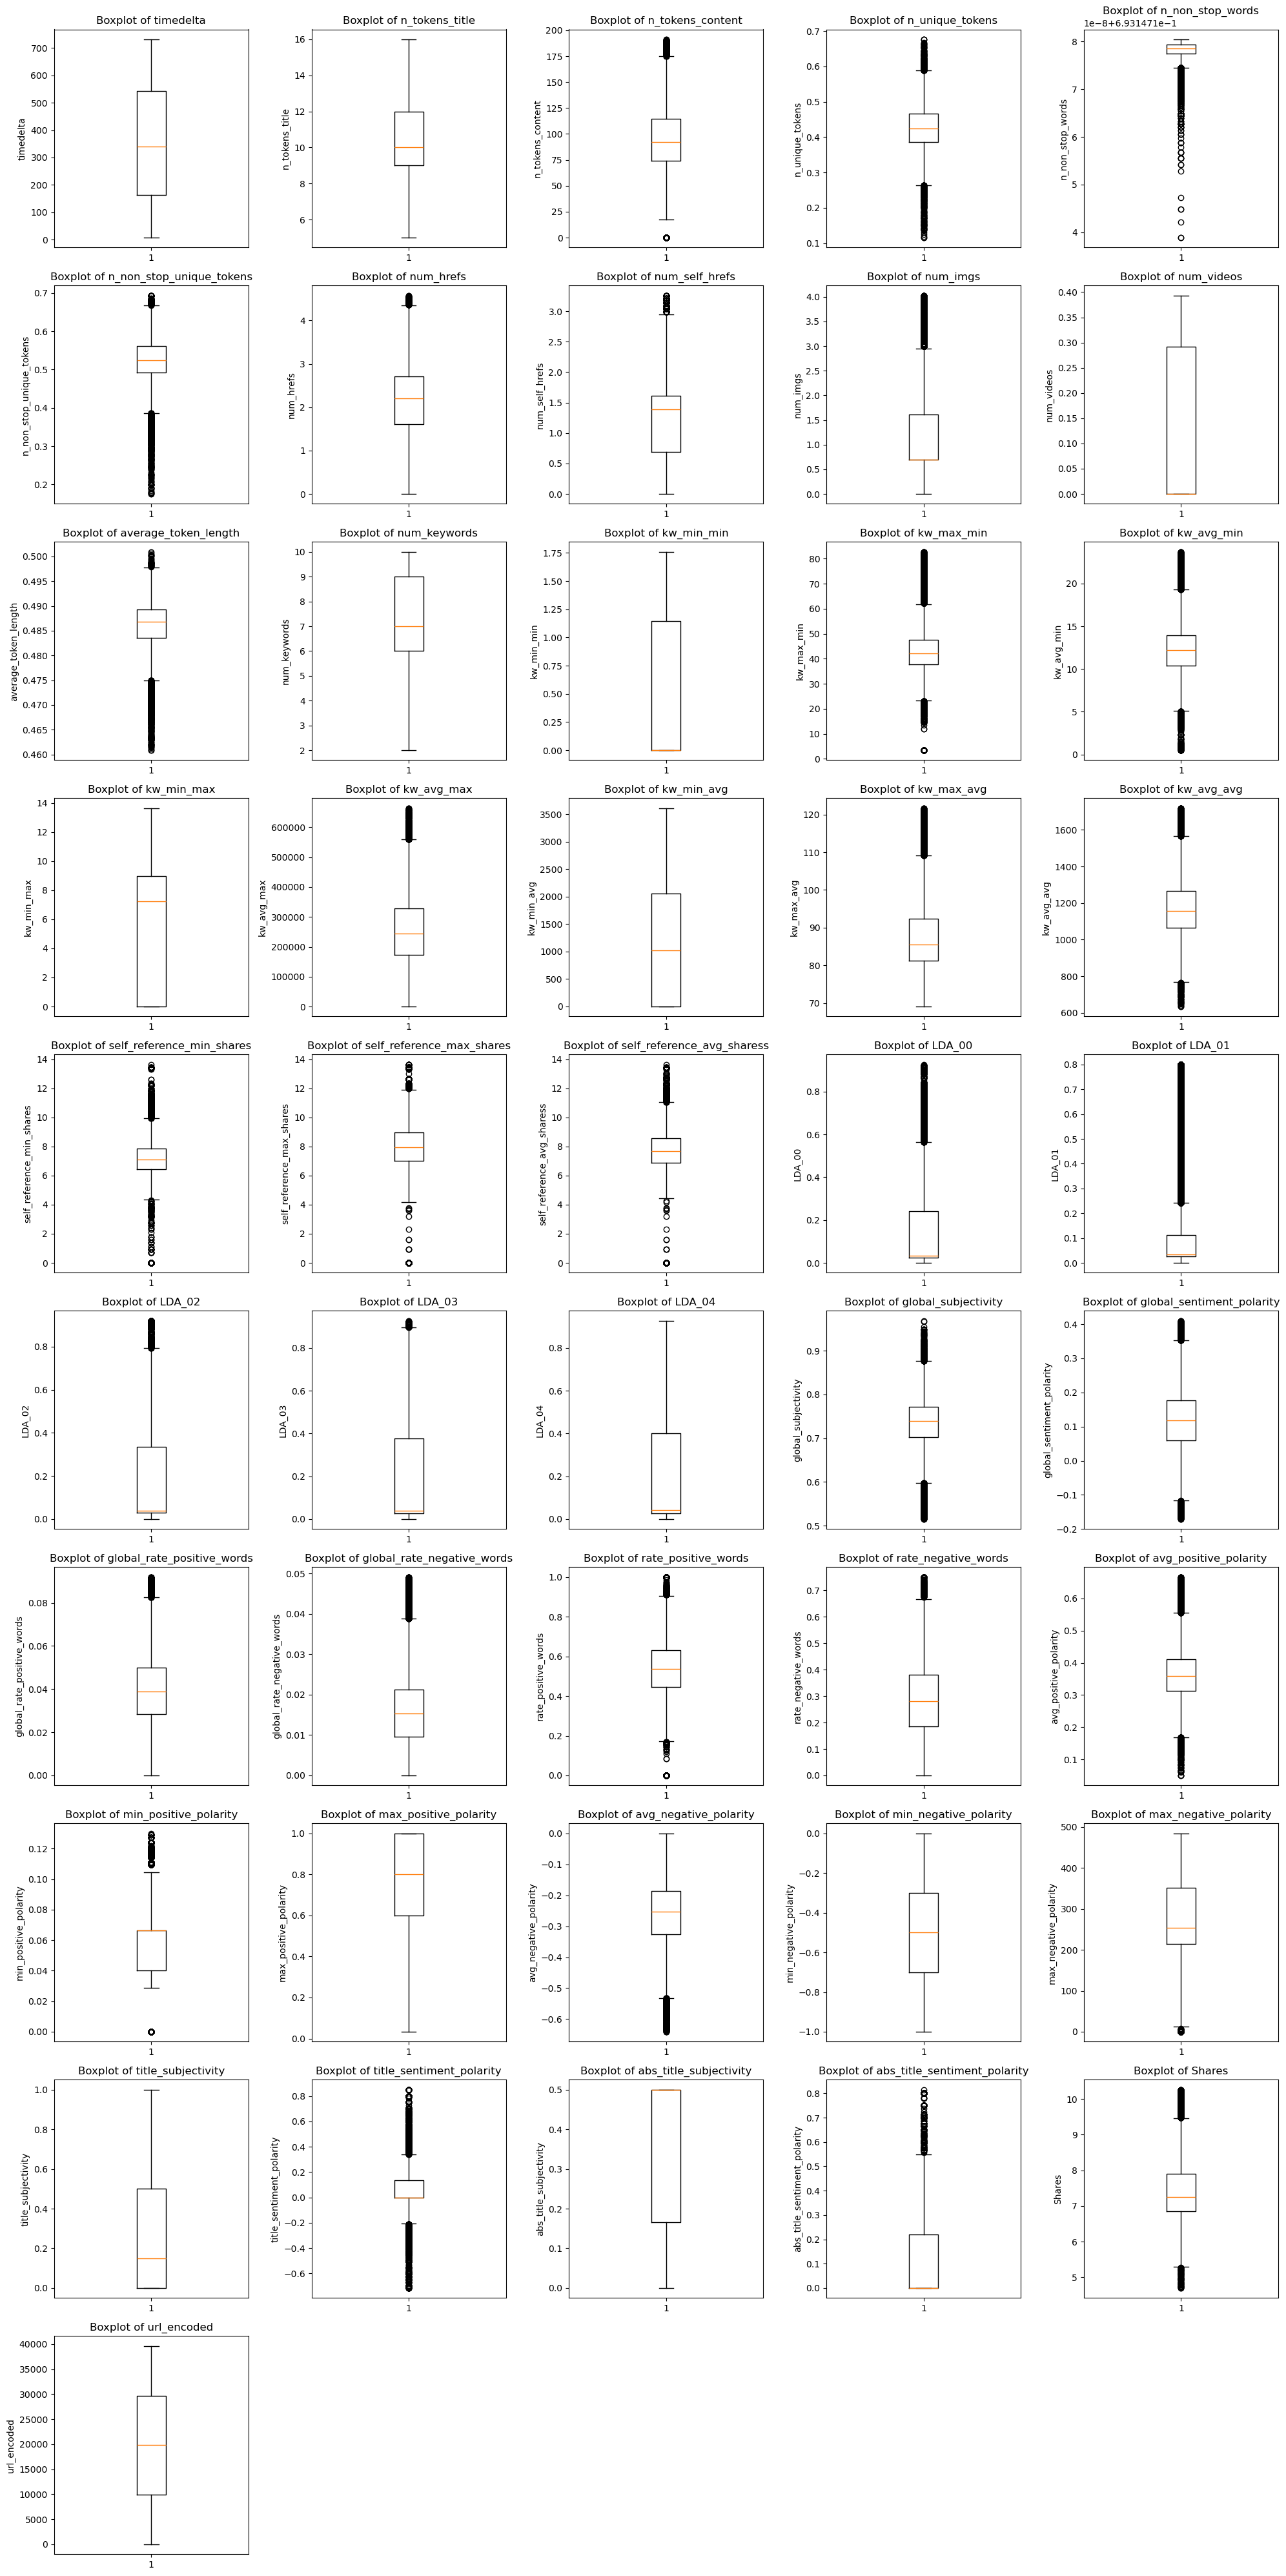

In [46]:
plot_boxplot()

In [47]:
df = df_new.copy()

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center">Preparing Data for Model: Splitting Features and Target Variable </h2>

In machine learning, one of the crucial steps in building a model is to split the dataset into two parts: features (independent variables) and the target (dependent variable). This division helps the model learn patterns in the data by using the features to predict the target variable.

In [48]:
x = df.drop('Shares',axis=1)
y = df['Shares']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
"Training set", x_train.shape, y_train.shape

('Training set', (31715, 60), (31715,))

In [51]:
"Testing set", x_test.shape, y_test.shape

('Testing set', (7929, 60), (7929,))

<font color='green'>**The dataset has split into features (x) and target variable (y) in preparation for modeling and then split into training and testing sets using the train_test_split**</font>

### Feature Importance Analysis

<font color='green'>**We can perform feature importance analysis on tree-based models like Decision Tree, Random Forest, and Gradient Boosting**</font>

Feature importance is a technique used to determine the contribution of each feature in a dataset to the predictive power of a machine learning model. Gradient Boosting is a powerful method for feature importance analysis because it builds predictive models iteratively while prioritizing the features that contribute most to reducing prediction errors.

Gradient Boosting accurately evaluates the contribution of each feature to predictive performance while handling complex data patterns and interactions. Its built-in metrics and flexibility make it a powerful tool for identifying and prioritizing features in machine learning pipelines.

In [60]:
# Fitting Gradient Boosting Regressor to the dataset
regressor = RandomForestRegressor(random_state=42)

# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

importances = regressor.feature_importances_
feature_names = x.columns

feature_importances = pd.DataFrame({'Feature' : feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False )

print("Feature Importances:\n", feature_importances)

Feature Importances:
                           Feature  Importance
26                     kw_avg_avg    0.080253
25                     kw_max_avg    0.037458
27      self_reference_min_shares    0.031986
59                    url_encoded    0.031063
29     self_reference_avg_sharess    0.030653
23                     kw_avg_max    0.030564
43            global_subjectivity    0.029810
39                         LDA_01    0.029080
10           average_token_length    0.028830
42                         LDA_04    0.028761
5        n_non_stop_unique_tokens    0.028633
20                     kw_avg_min    0.028122
3                 n_unique_tokens    0.027611
40                         LDA_02    0.027471
38                         LDA_00    0.027164
41                         LDA_03    0.026924
49          avg_positive_polarity    0.026878
45     global_rate_positive_words    0.025353
19                     kw_max_min    0.025338
2                n_tokens_content    0.024823
44      glob

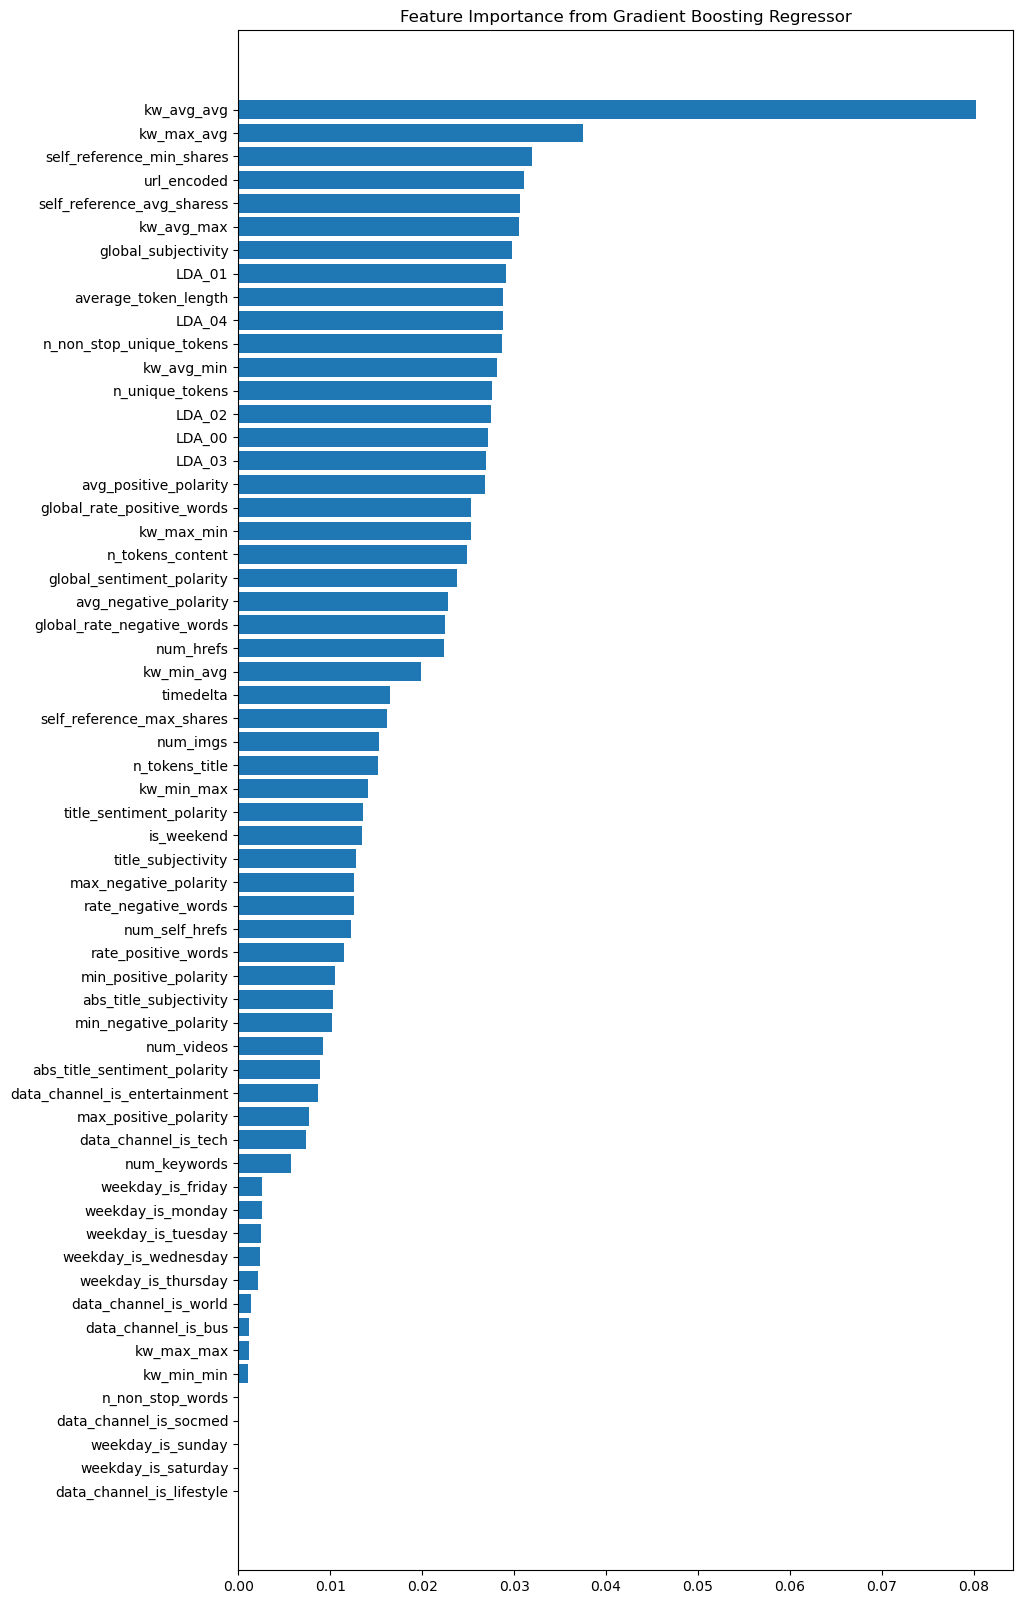

In [61]:
# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

kw_avg_avg (0.073264),  kw_max_avg( 0.03631),   kw_avg_m (  0.0309),    self_reference_avg_share(   0.029)20) are the features which have significant impact on popularity.

weekday_is_friday (0.002586),  weekday_is_tuesday( 0.00250),   weekday_is_wednesda(  0.0024),    weekday_is_mond(   0.002),     weekday_is_thurs(    0.00),      n_non_stop_w(s    0.0),       weekday_is_sat(ay    0.), 2      data_channel_is_lif(yle    0),         kw_(_min    ),          data_channel(world   ),           data_chann(is_bus  ),            weekday(_sunday ),            (0.000532) _stop_words, weekday_is_mnegligible onday are the fe, and url_encoded column is also irrevlevent for prediction. so we can drop those 14 columns!!ue 0 and so we cxan drop that.

weekday_is_saturday (0.000855), min_positive_polarity (0.000524) are those having very negligible value, so we'll drop that too.

In [62]:
columns_to_drop = ['weekday_is_monday','weekday_is_friday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','data_channel_is_world','data_channel_is_bus',
                   'kw_max_max','kw_min_min','data_channel_is_lifestyle','data_channel_is_socmed','weekday_is_sunday','weekday_is_saturday','url_encoded']

In [63]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [64]:
x = df.drop('Shares',axis=1)
y = df['Shares']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Standardizing Features

Standardization is a technique used to transform features in a dataset so that they have a mean of 0 and a standard deviation of 1. This process is essential for machine learning algorithms that rely on the distance between data points or assume that the data is normally distributed. It ensures that all features contribute equally to the model, regardless of their original scale or units.

In [446]:
#scaler = StandardScaler()
#x_train_scaled= scaler.fit_transform(x_train)

In [447]:
#x_train = x_train_scaled

<font color='green'>**If we standardize or normalize before splitting, the test data will influence the scaling parameters (e.g., mean, standard deviation, or range). This leads to data leakage, as information from the test set indirectly influences the training process. That's why we did it after splitting**</font>

In [448]:
#x_test_scaled = scaler.fit_transform(x_test)
#x_test = x_test_scaled

<font color='green'>**Similarly we did on testing set too**</font>

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Model Implementation </h2>

**1.Linear Regression**
Linear Regression is one of the simplest and most widely used algorithms in machine learning for predicting a continuous target variable based on one or more independent features. The model assumes a linear relationship between the target variable y and the features X.

The equation for a simple linear regression model is:
𝑦 = 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + ... + 𝛽𝑛𝑋𝑛 + 𝜖

**2. Decision Tree Regressor**
Decision Tree Regressor is a non-linear model that builds a decision tree to predict a target variable by recursively splitting the data into subsets based on feature values. It is a type of supervised learning model that is used for regression tasks.

The decision tree splits the data into smaller subsets based on the value of a feature that minimizes the variance or error within each subset.

Each split forms a decision node, and each leaf node represents a predicted value for the target variable.

The decision tree model makes decisions by following the branches from the root node to the leaf nodes.

**3. Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy. It is based on the bagging technique, where each tree is trained on a random subset of the data.

Random forests create multiple decision trees by randomly sampling subsets of data and features. Each tree is trained independently, and their predictions are averaged (for regression tasks) to make the final prediction.

It helps mitigate the overfitting problem of individual decision trees by averaging over many trees.

**4. Gradient Boosting Regressor**
Gradient Boosting Regressor is an ensemble learning technique that builds trees sequentially, where each tree tries to correct the errors made by the previous one. It uses a boosting method, which means that it focuses on the hardest-to-predict data points.

The gradient boosting model creates decision trees one at a time, each correcting the errors of the previous tree by fitting a model to the residuals (errors) of the predictions.

The idea is to minimize the residual sum of squares (RSS) between the true values and the predicted values.

It uses a gradient descent algorithm to minimize the loss function and optimize the model.

**5. Support Vector Regressor (SVR)**
Support Vector Regressor (SVR) is a type of Support Vector Machine (SVM), which is used for regression tasks. SVR tries to find a function that approximates the target values within a certain margin of error, while simultaneously keeping the model as simple as possible.

SVR works by finding a hyperplane in a high-dimensional feature space that best fits the data, while allowing for some margin of error.

Unlike linear regression, which aims to minimize the squared error, SVR tries to minimize the error within a predefined epsilon margin (a small tolerance of error).

It uses the kernel trick to transform the data into a higher-dimensional space where it can find non-linear relationships.

### Model Building

In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Dictionary to store the results
results = {}

### Model Training

In [67]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }

In [68]:
results

{'Linear Regression': {'R-squared': 0.1364358841716582,
  'MSE': 0.6167238275204833,
  'MAE': 0.6022379921788549},
 'Decision Tree Regressor': {'R-squared': -0.727674884334448,
  'MSE': 1.2338380530734643,
  'MAE': 0.8432294120897791},
 'Random Forest Regressor': {'R-squared': 0.15462203689595355,
  'MSE': 0.6037359861889323,
  'MAE': 0.5980830799871232},
 'Gradient Boosting Regressor': {'R-squared': 0.16262768119098414,
  'MSE': 0.5980186671145253,
  'MAE': 0.5921490074930897},
 'Support Vector Regressor': {'R-squared': -0.027427274732633622,
  'MSE': 0.7337485077923301,
  'MAE': 0.6362206410183248}}

### Model Evaluation

<font color = 'green'>**For model evaluation, we will calculate the R², MSE, and MAE for each model on the test set.**</font>

**Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. A lower value indicates better performance.

**Mean Absolute Error (MAE)**: Captures the average absolute difference between actual and predicted values, providing a more interpretable error metric in the original units of the target variable.
    
**R-squared (R²)**: Indicates how well the model explains the variability in the target variable. Higher values (closer to 1) imply better performance.

<font color="Green">**A model with the highest R-squared and lowest MSE/MAE is generally preferred.**</font>

In [69]:
for model_name, metrics in results.items():
    print(f"{model_name}:\n R-squared: {metrics['R-squared']}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}\n")

Linear Regression:
 R-squared: 0.1364358841716582, MSE: 0.6167238275204833, MAE: 0.6022379921788549

Decision Tree Regressor:
 R-squared: -0.727674884334448, MSE: 1.2338380530734643, MAE: 0.8432294120897791

Random Forest Regressor:
 R-squared: 0.15462203689595355, MSE: 0.6037359861889323, MAE: 0.5980830799871232

Gradient Boosting Regressor:
 R-squared: 0.16262768119098414, MSE: 0.5980186671145253, MAE: 0.5921490074930897

Support Vector Regressor:
 R-squared: -0.027427274732633622, MSE: 0.7337485077923301, MAE: 0.6362206410183248



<font color = 'green'>**Inference from the Performance Metrics :**</font>

The <font color ="red">**Gradient Boosting Regressor is the best-performing model**</font> based on: 
-  The highest R² : (0.16) which is close to 1
-  The lowest MSE (0.59)
-  The lowest MAE (0.59)

The Random Forest Regressor also showed competitive performance, with a low MAE (0.5980), high R² score(0.1546) making it a viable alternative depending on the context.

In [86]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='tanh'))  # changed activation function
model.add(Dense(64, activation='tanh'))  # added another layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile with a different optimizer (e.g., RMSprop)
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# Retrain the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=32)

# Re-evaluate the performance
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Epoch 1/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8307 - val_loss: 0.7157
Epoch 2/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.7274 - val_loss: 0.7595
Epoch 3/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7238 - val_loss: 0.7914
Epoch 4/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.7068 - val_loss: 0.8214
Epoch 5/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.7151 - val_loss: 0.8043
Epoch 6/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7087 - val_loss: 0.7161
Epoch 7/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7171 - val_loss: 0.8179
Epoch 8/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 0.7093 - val_loss: 0.9293
Epoch 9/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - loss: 0.7159 - val_loss: 0.8408
Epoch 10/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - loss: 0.7112 - val_loss: 1.0080
Epoch 11/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 0.7021 - val_loss: 0.7725
Epoch 12/150
992/992 ━━━━━━

In [80]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         3,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)

In [81]:
# Predict on the test set
y_pred = model.predict(x_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
Mean Squared Error: 42.11698086332792
R² Score: -57.9740686472682


<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Training and Testing Comparison </h2>

**The analysis shows that the model performs consistently across training and test datasets, with minor differences in performance metrics.**

In [ ]:
# Function to check overfitting
def check_overfitting(model, x_train, y_train, x_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(x_train)
    
    # Predict on test data
    y_test_pred = model.predict(x_test)
    
    # Evaluate on training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Evaluate on test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Training Performance:")
    print(f"MSE: {mse_train}, MAE: {mae_train}, R²: {r2_train}")
    print(f"Test Performance:")
    print(f"MSE: {mse_test}, MAE: {mae_test}, R²: {r2_test}")
    
    # Compare training and test performance
    print("\nDifference between training and test performance:")
    print(f"MSE Difference: {mse_train - mse_test}")
    print(f"MAE Difference: {mae_train - mae_test}")
    print(f"R² Difference: {r2_train - r2_test}")

# Check for overfitting on the best model (e.g., Random Forest Regressor)
check_overfitting(models["Gradient Boosting Regressor"], x_train, y_train, x_test, y_test)

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Hyperparameter Tuning </h2>

Hyperparameter tuning is the process of selecting the best set of hyperparameters for a machine learning model to improve its performance. Hyperparameters are parameters that are set before the learning process begins, and they control the training process or the model's architecture. Unlike model parameters (which are learned from the data during training), hyperparameters are manually set by the data scientist.

The goal of hyperparameter tuning is to find the optimal combination of hyperparameters that leads to the best performance of the model on unseen data, improving its accuracy, generalization, and robustness.

In [161]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}


random_search = RandomizedSearchCV(
    models["Gradient Boosting Regressor"], param_distributions=param_dist, n_iter=20, cv=3, verbose=2, n_jobs=-1
)
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   verbose=2)

#### Check the best parameters and best score

In [162]:
# Print the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05}
Best CV Score: 0.16302258337848166


In [163]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(x_test)

In [164]:
# Performance of the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Performance:\n R-squared: {r2_best}, MSE: {mse_best}, MAE: {mae_best}")

Best Model Performance:
 R-squared: 0.1645012487148163, MSE: 0.4691916398917856, MAE: 0.5293225551266578


## Model Training using Deeplearning

In [89]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=150, verbose=1)

y_pred = model.predict(x_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Epoch 1/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 42.3058
Epoch 2/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.1061
Epoch 3/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.1533
Epoch 4/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.2056
Epoch 5/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.1440
Epoch 6/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.2626
Epoch 7/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.1857
Epoch 8/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.2531
Epoch 9/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.2344
Epoch 10/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 42.0989
Epoch 11/150
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - 

In [90]:
# Modify the model with more layers or different activation functions
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='tanh'))  # changed activation function
model.add(Dense(64, activation='tanh'))  # added another layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile with a different optimizer (e.g., RMSprop)
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# Retrain the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=32)

# Re-evaluate the performance
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Mean Squared Error: {mse}")
print(f"Improved R² Score: {r2}")

Epoch 1/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5771 - val_loss: 0.9073
Epoch 2/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7100 - val_loss: 0.8273
Epoch 3/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7113 - val_loss: 0.7519
Epoch 4/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7171 - val_loss: 0.8864
Epoch 5/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7198 - val_loss: 0.7575
Epoch 6/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6964 - val_loss: 0.7651
Epoch 7/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7128 - val_loss: 0.8739
Epoch 8/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6909 - val_loss: 0.8588
Epoch 9/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7181 - val_loss: 0.8283
Epoch 10/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7139 - val_loss: 0.7164
Epoch 11/200
992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7060 - val_loss: 0.7141
Epoch 12/200
992/992 ━━━━━━━━━━━━━━━━━━━━

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Key Findings of the Project</h2>

The Online News Popularity Prediction Project aimed to analyze and predict the popularity of online news articles based on various attributes, such as content features, social engagement metrics, and article metadata. The study identifies key factors influencing popularity and provide actionable insights for content creators and digital marketers.

**Data Insights:**

The dataset revealed several key patterns, such as:
- Articles with certain features (e.g., key words, no. of shares, topic category, number of images/videos) were more likely to be popular.
- Time-based factors, such as the day of the week had notable effects on article engagement.
- Outliers were detected in metrics like shares, indicating a small number of articles gained disproportionately high popularity.

**Feature Importance:**

- Feature importance analysis indicated that variables such as keywords related columns,shares of referenced articles, global subjectivity, topic related columns etc played a significant role in predicting popularity.
- This insight emphasizes that both content quality and topic slection are crucial to online engagement.

**Model Performance:**

- Multiple machine learning models were tested, including Linear Regression, Decision Tree Regressors, Random Forests, and Gradient Boosting Regressors.
- Among these, Gradient Boosting Regressor outperformed others, achieving an R-squared value of 0.16, a Mean Absolute Error of 0.59, and a Mean Squared Error of 0.62.
- The evaluation highlighted the robustness of ensemble model like Gradient Boosting in handling complex relationships between features and popularity.

<h2 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Conclusion </h2>

This project demonstrated that machine learning can effectively analyze and predict online article popularity, offering insights into the factors driving virality. The results could aid content creators and digital marketers in optimizing article performance by focusing on influential features such as channel selection, timing of publication, and keyword usage.

However, the inherent variability in human behavior and external factors (e.g., breaking news, trends) limits the scope of purely data-driven predictions. Future research could incorporate additional data sources, such as social media metrics or sentiment analysis, to enhance model performance and applicability.